  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/28/ba/8be09886eb56ac04a218a1dc3fa728a5c4cac60b019b4f1687885166da00/matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/05/46/9256dd162ea52790c127cb58cfc3b9e3413a6e3478917d1f811d420772ec/contourpy-1.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached contourpy-1.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/37/2e/f94118b92

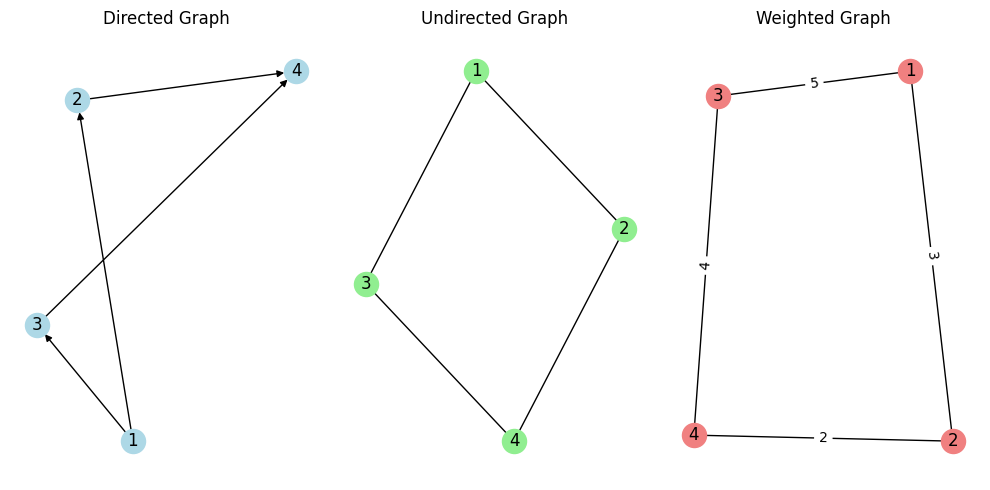

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# 유향 그래프 (Directed Graph)
directed_graph = nx.DiGraph()
directed_graph.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
nx.draw(directed_graph, with_labels=True, node_color='lightblue', arrows=True)
plt.title("Directed Graph")

# 무향 그래프 (Undirected Graph)
undirected_graph = nx.Graph()
undirected_graph.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])

plt.subplot(1, 3, 2)
nx.draw(undirected_graph, with_labels=True, node_color='lightgreen')
plt.title("Undirected Graph")

# 가중치 그래프 (Weighted Graph)
weighted_graph = nx.Graph()
weighted_graph.add_weighted_edges_from([(1, 2, 3), (1, 3, 5), (2, 4, 2), (3, 4, 4)])

plt.subplot(1, 3, 3)
pos = nx.spring_layout(weighted_graph)
nx.draw(weighted_graph, pos, with_labels=True, node_color='lightcoral')
edge_labels = nx.get_edge_attributes(weighted_graph, 'weight')
nx.draw_networkx_edge_labels(weighted_graph, pos, edge_labels=edge_labels)
plt.title("Weighted Graph")

plt.tight_layout()
plt.show()

In [2]:
# import numpy as np

# 노드 수
n = 4

# 인접 행렬 초기화 (무향 그래프 예시)
adjacency_matrix = [ [0] * n for _ in range(n) ]

# 엣지 추가 (예: 0-1, 0-2, 1-2, 2-3)
edges = [(0, 1), (0, 2), (1, 2), (2, 3)]

for edge in edges:
    u, v = edge
    adjacency_matrix[u][v] = 1
    adjacency_matrix[v][u] = 1  # 무향 그래프이므로 대칭으로 추가

print("Adjacency Matrix:")
print(adjacency_matrix)

Adjacency Matrix:
[[0, 1, 1, 0], [1, 0, 1, 0], [1, 1, 0, 1], [0, 0, 1, 0]]


In [5]:
# 인접 리스트 초기화
adjacency_list = {0: [], 1: [], 2: [], 3: []}

# 엣지 추가 (예: 0-1, 0-2, 1-2, 2-3)
edges = [(0, 1), (0, 2), (1, 2), (2, 3)]

for edge in edges:
    u, v = edge
    adjacency_list[u].append(v)
    adjacency_list[v].append(u)  # 무향 그래프이므로 대칭으로 추가

print("Adjacency List:")
for key, value in adjacency_list.items():
    print(f"{key}: {value}")

Adjacency List:
0: [1, 2]
1: [0, 2]
2: [0, 1, 3]
3: [2]


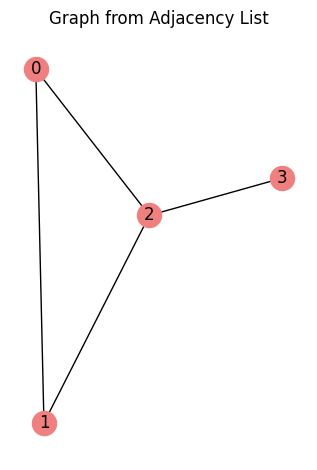

In [28]:
class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []
        self.graph[u].append(v)
        if v not in self.graph:
            self.graph[v] = []
        self.graph[v].append(u)

    def print_graph(self):
        for vertex in self.graph:
            print(vertex, ":", self.graph[vertex])
     

In [29]:
graph = Graph()
graph.add_edge(0, 1)
graph.add_edge(0, 2)
graph.add_edge(1, 2)
graph.add_edge(2, 3)
graph.print_graph()


0 : [1, 2]
1 : [0, 2]
2 : [0, 1, 3]
3 : [2]


In [10]:
graph.graph

{0: [1, 2], 1: [2], 2: [3]}

/var/folders/zz/qkcs__mj131c3rpjqqsq6kgh0000gn/T/ipykernel_9824/3882889314.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


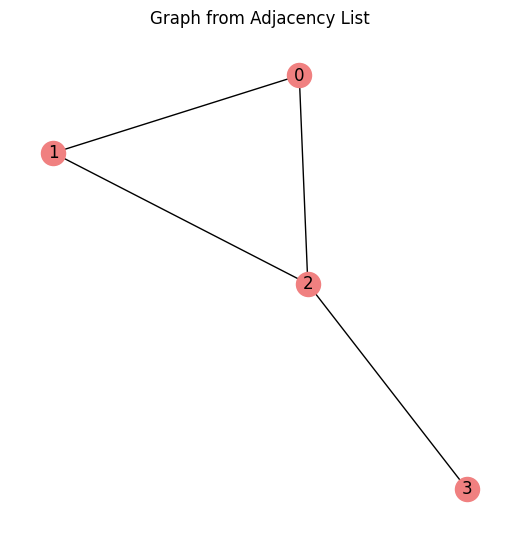

In [31]:
import networkx as nx
import matplotlib.pyplot as plt


# 인접 리스트를 이용한 그래프 생성
adjacency_list_graph = nx.Graph(graph.graph)

plt.figure(figsize=(5, 5))
nx.draw(adjacency_list_graph, with_labels=True, node_color='lightcoral')
plt.title("Graph from Adjacency List")

plt.tight_layout()
plt.show()



In [21]:
# 그래프를 인접 리스트로 표현
graph.graph

{0: [1, 2], 1: [0, 2], 2: [0, 1, 3], 3: [2]}

In [27]:
graph.graph

{0: [1, 2], 1: [0, 2], 2: [0, 1, 3], 3: [2]}

In [33]:
def dfs_iterative(graph, start):
    visited = set()  # 방문한 노드를 저장할 집합
    stack = [start]  # 스택 초기화

    while stack:
        node = stack.pop()  # 스택에서 노드 꺼내기
        print("node:", node)
        if node not in visited:
            print("visited:", node)
            # print(node, end=' ')
            visited.add(node)
            # 이웃 노드를 스택에 추가 (역순으로 추가)
            stack.extend(reversed(graph[node]))

# DFS 호출
print("\nDFS Iterative:")
dfs_iterative(graph.graph, 0)



DFS Iterative:
node: 0
visited: 0
node: 1
visited: 1
node: 0
node: 2
visited: 2
node: 0
node: 1
node: 3
visited: 3
node: 2
node: 2


In [36]:
graph.graph

{0: [1, 2], 1: [0, 2], 2: [0, 1, 3], 3: [2]}

In [35]:
def dfs_recursive(node, visited):
    if node not in visited:
        print(node, end=' ')
        visited.add(node)
        for neighbor in graph.graph[node]:
            dfs_recursive(neighbor, visited)

# DFS 호출
visited_nodes = set()
print("DFS Recursive:")
dfs_recursive(0, visited_nodes)


DFS Recursive:
0 1 2 3 


DFS Iterative:
A B D E F C 

In [39]:
graph_a = Graph()
graph_a.add_edge(0, 1)
graph_a.add_edge(0, 2)
graph_a.add_edge(0, 3)
graph_a.add_edge(1, 2)
graph_a.add_edge(2, 4)
graph_a.print_graph()


0 : [1, 2, 3]
1 : [0, 2]
2 : [0, 1, 4]
3 : [0]
4 : [2]


In [42]:
graph_a.graph

{0: [1, 2, 3], 1: [0, 2], 2: [0, 1, 4], 3: [0], 4: [2]}

/var/folders/zz/qkcs__mj131c3rpjqqsq6kgh0000gn/T/ipykernel_9824/1524574411.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


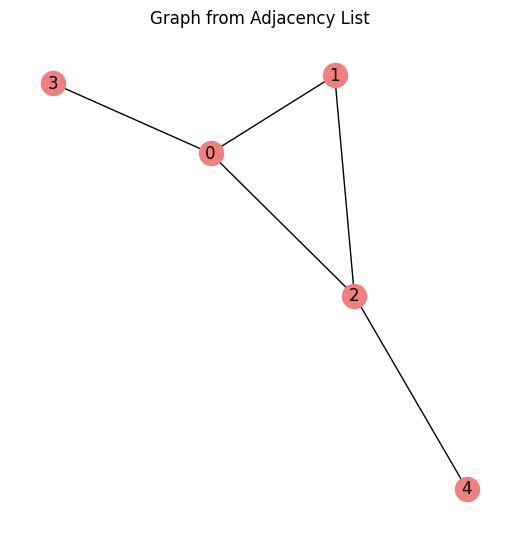

In [40]:
import networkx as nx
import matplotlib.pyplot as plt


# 인접 리스트를 이용한 그래프 생성
adjacency_list_graph = nx.Graph(graph_a.graph)

plt.figure(figsize=(5, 5))
nx.draw(adjacency_list_graph, with_labels=True, node_color='lightcoral')
plt.title("Graph from Adjacency List")

plt.tight_layout()
plt.show()

